### Resource : "https://www.youtube.com/watch?v=6cg5ERPQ2v8"

In [1]:
%conda install -c conda-forge shap

Retrieving notices: ...working... done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::autopep8==2.0.4=pyhd8ed1ab_0
  - conda-forge/noarch::bleach==6.1.0=pyhd8ed1ab_0
  - conda-forge/noarch::plotly==5.18.0=pyhd8ed1ab_0
  - conda-forge/noarch::pytest==7.4.3=pyhd8ed1ab_0
  - conda-forge/noarch::qtpy==2.4.1=pyhd8ed1ab_0
  - conda-forge/linux-64::sip==6.7.12=py310hc6cd4ac_0
  - conda-forge/noarch::tqdm==4.66.1=pyhd8ed1ab_0
  - conda-forge/noarch::nltk==3.8.1=pyhd8ed1ab_0
  - conda-forge/linux-64::pyqt5-sip==12.12.2=py310hc6cd4ac_5
  - conda-forge/noarch::pytoolconfig==1.2.5=pyhd8ed1ab_0
  - conda-forge/noarch::qdarkstyle==3.1=pyhd8ed1ab_0
  - conda-forge/noarch::qtawesome==1.2.3=pyhd8ed1ab_0
  - conda-forge/linux-64::black==23.10.1=py310hff52083_0
  - conda-forge/noarch::dask-core==2023.10.0=pyhd8ed1ab_0
  - conda-forge/noarch::pylint==2.17.7=pyhd8ed1ab_0
  - cond

## Explore and Transform Dataset

In [1]:
  import shap
import warnings
warnings.filterwarnings("ignore")
X,y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names 

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

In [4]:
display(X.describe())

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.648804,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

#seperating Validation
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=1)
X_val_display = X_display.loc[X_val.index]

In [8]:
import pandas as pd
train = pd.concat([pd.Series(y_train,index = X_train.index,
                            name= "Income>50k",dtype=int),
                  X_train],axis=1)

validation = pd.concat([pd.Series(y_val,index = X_val.index,
                            name= "Income>50k",dtype=int),
                  X_val],axis=1)

test = pd.concat([pd.Series(y_test,index = X_test.index,
                            name= "Income>50k",dtype=int),
                  X_test],axis=1)

In [9]:
train

,Income>50k,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [10]:
##save all splits into csv
#Use csv formats to store the data
#The first column is expected to be the output column   : SHOULD FOLLOW
train.to_csv("train.csv",index=False, header=False)
validation.to_csv("validation.csv",index=False, header=False)

In [11]:
#Now to store the train,val datasets into "S3" use sagemaker,boto3 libraries
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

#upload the trianing data set to s3 bucket
boto3.Session().resource("s3").Bucket(bucket).Object(
os.path.join(prefix,"data/train.csv")).upload_file("train.csv")

#upload the validation data set to s3 bucket
boto3.Session().resource("s3").Bucket(bucket).Object(
os.path.join(prefix,"data/validation.csv")).upload_file("validation.csv")



sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [12]:
!aws s3 ls {bucket}/{prefix}/data --recursive

2023-12-13 18:18:16     786285 demo-sagemaker-xgboost-adult-income-prediction/data/train.csv
2023-12-13 18:18:16     262122 demo-sagemaker-xgboost-adult-income-prediction/data/validation.csv


### Train Model

In [15]:
import sagemaker

region = sagemaker.Session().boto_region_name
print(f"Aws Region: {region}")

role = sagemaker.get_execution_role()
print(f"RoleArn: {role}")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
Aws Region: us-east-1
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
RoleArn: arn:aws:iam::324372733515:role/service-role/AmazonSageMaker-ExecutionRole-20231213T172100


In [14]:
sagemaker.__version__

'2.199.0'

In [16]:
from sagemaker.debugger import Rule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location = f"s3://{bucket}/{prefix}/xgboost_model"

container = sagemaker.image_uris.retrieve("xgboost",region,"1.2-1")
print(container)

683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.2-1


In [17]:
xgb_model = sagemaker.estimator.Estimator(image_uri = container,
                                         role=role,
                                         instance_count=1,
                                         instance_type="ml.m4.xlarge",
                                         volume_size=5,
                                         output_path=s3_output_location,
                                         sagemaker_session = sagemaker.Session(),
                                         rules = [Rule.sagemaker(rule_configs.create_xgboost_report())])

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [18]:
xgb_model.set_hyperparameters(max_depth = 5,
                             eta=0.2,
                             gamma=4,
                             min_child_weight = 6,
                             subsample = 0.7,
                             objective = "binary:logistic",
                             num_round = 1000
                             )

In [20]:
from sagemaker.session import TrainingInput  

train_input = TrainingInput(f"s3://{bucket}/{prefix}/data/train.csv",
                           content_type="csv")
validation_input = TrainingInput(f"s3://{bucket}/{prefix}/data/validation.csv",
                           content_type="csv")

In [21]:
xgb_model.fit({"train":train_input,"validation":validation_input},wait=True)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-12-13-18-35-02-142


2023-12-13 18:35:02 Starting - Starting the training job...
2023-12-13 18:35:27 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
............
2023-12-13 18:37:29 Downloading - Downloading input data......
2023-12-13 18:38:26 Downloading - Downloading the training image...
2023-12-13 18:38:55 Training - Training image download completed. Training in progress...[2023-12-13 18:39:07.654 ip-10-2-178-54.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter 

[366]#011train-error:0.11348#011validation-error:0.13206
[367]#011train-error:0.11312#011validation-error:0.13283
[368]#011train-error:0.11323#011validation-error:0.13268
[369]#011train-error:0.11338#011validation-error:0.13283
[370]#011train-error:0.11328#011validation-error:0.13268
[371]#011train-error:0.11323#011validation-error:0.13314
[372]#011train-error:0.11307#011validation-error:0.13314
[373]#011train-error:0.11312#011validation-error:0.13329
[374]#011train-error:0.11348#011validation-error:0.13345
[375]#011train-error:0.11343#011validation-error:0.13360
[376]#011train-error:0.11343#011validation-error:0.13345
[377]#011train-error:0.11338#011validation-error:0.13345
[378]#011train-error:0.11353#011validation-error:0.13345
[379]#011train-error:0.11353#011validation-error:0.13345
[380]#011train-error:0.11359#011validation-error:0.13329
[381]#011train-error:0.11359#011validation-error:0.13283
[382]#011train-error:0.11369#011validation-error:0.13345
[383]#011train-error:0.11353#01

[601]#011train-error:0.11190#011validation-error:0.13636
[602]#011train-error:0.11169#011validation-error:0.13652
[603]#011train-error:0.11169#011validation-error:0.13682
[604]#011train-error:0.11164#011validation-error:0.13682
[605]#011train-error:0.11159#011validation-error:0.13713
[606]#011train-error:0.11144#011validation-error:0.13652
[607]#011train-error:0.11144#011validation-error:0.13667
[608]#011train-error:0.11123#011validation-error:0.13652
[609]#011train-error:0.11128#011validation-error:0.13652
[610]#011train-error:0.11138#011validation-error:0.13544
[611]#011train-error:0.11144#011validation-error:0.13560
[612]#011train-error:0.11144#011validation-error:0.13560
[613]#011train-error:0.11144#011validation-error:0.13560
[614]#011train-error:0.11128#011validation-error:0.13560
[615]#011train-error:0.11103#011validation-error:0.13621
[616]#011train-error:0.11113#011validation-error:0.13621
[617]#011train-error:0.11108#011validation-error:0.13621
[618]#011train-error:0.11128#01

[806]#011train-error:0.11041#011validation-error:0.13836
[807]#011train-error:0.11046#011validation-error:0.13836
[808]#011train-error:0.11041#011validation-error:0.13836
[809]#011train-error:0.11036#011validation-error:0.13821
[810]#011train-error:0.11046#011validation-error:0.13836
[811]#011train-error:0.11041#011validation-error:0.13821
[812]#011train-error:0.11051#011validation-error:0.13851
[813]#011train-error:0.11056#011validation-error:0.13821
[814]#011train-error:0.11021#011validation-error:0.13790
[815]#011train-error:0.11010#011validation-error:0.13805
[816]#011train-error:0.11016#011validation-error:0.13821
[817]#011train-error:0.11021#011validation-error:0.13821
[818]#011train-error:0.11036#011validation-error:0.13821
[819]#011train-error:0.11021#011validation-error:0.13851
[820]#011train-error:0.11021#011validation-error:0.13821
[821]#011train-error:0.11016#011validation-error:0.13851
[822]#011train-error:0.11010#011validation-error:0.13851
[823]#011train-error:0.11021#01


2023-12-13 18:40:00 Uploading - Uploading generated training model[991]#011train-error:0.10841#011validation-error:0.13728
[992]#011train-error:0.10872#011validation-error:0.13698
[993]#011train-error:0.10867#011validation-error:0.13682
[994]#011train-error:0.10867#011validation-error:0.13652
[995]#011train-error:0.10867#011validation-error:0.13682
[996]#011train-error:0.10867#011validation-error:0.13682
[997]#011train-error:0.10826#011validation-error:0.13698
[998]#011train-error:0.10821#011validation-error:0.13667
[999]#011train-error:0.10821#011validation-error:0.13667

2023-12-13 18:40:27 Completed - Training job completed
Training seconds: 163
Billable seconds: 163


In [22]:
rule_output_path = xgb_model.output_path + "/" + xgb_model.latest_training_job.name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

In [23]:
! aws s3 cp {rule_output_path} ./ --recursive

In [24]:
from IPython.display import FileLink, FileLinks
display("Click Link below to view the XGBoost Training report",
       FileLink("CreateXGBoostReport/xgboost_report.html"))

'Click Link below to view the XGBoost Training report'

/home/ec2-user/SageMaker/CreateXGBoostReport/xgboost_report.html

In [30]:
#SUMMARY OF THE MODEL AND JOB REPORT

profiler_report_name = [rule["RuleConfigurationName"]
                       for rule in xgb_model.latest_training_job.rule_job_summary() 
                        if "Profiler" in rule["RuleConfigurationName"]]

print(profiler_report_name)
display("Click link below to view the profiler report", 
       FileLink(profiler_report_name + "/profiler-output/profiler-report.html"))

[]


TypeError: can only concatenate list (not "str") to list

In [31]:
xgb_model.model_data

's3://sagemaker-us-east-1-324372733515/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-12-13-18-35-02-142/output/model.tar.gz'

In [32]:
## DEPLOY THE MODEL

In [33]:
import sagemaker
from sagemaker.serializers import CSVSerializer

xgb_predictor = xgb_model.deploy(initial_instance_count = 1,
                                instance_type= "ml.t2.medium",
                                serializer = CSVSerializer())

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-12-13-18-52-41-707
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2023-12-13-18-52-41-707
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2023-12-13-18-52-41-707


--------!

In [34]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2023-12-13-18-52-41-707'

### Evaluate the model

In [53]:
import numpy as np
def predict(data,rows=1000):
    split_array = np.array_split(data,int(data.shape[0] / float(rows)+1))
    predictions = ''
    for array in split_array:
        predictions = ",".join([predictions, xgb_predictor.predict(array).decode("utf-8")])

    return np.fromstring(predictions[1:],sep=",")

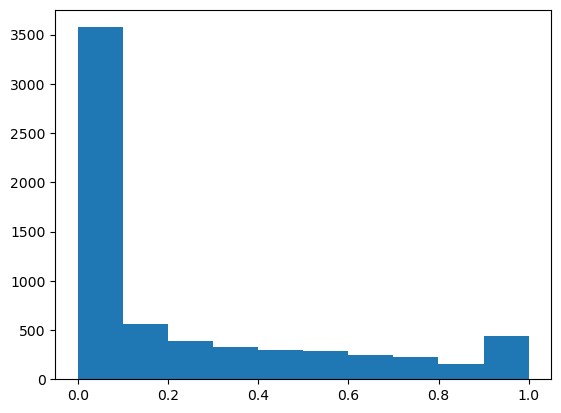

In [54]:
import matplotlib.pyplot as plt

predictions = predict(test.to_numpy()[:,1:])

plt.hist(predictions)
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix, classification_report,log_loss

cutoff = 0.5
print(confusion_matrix(test.iloc[:,0], np.where(predictions > cutoff,1,0)))
print(classification_report(test.iloc[:,0], np.where(predictions > cutoff,1,0)))


[[4670  356]
 [ 480 1007]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.74      0.68      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



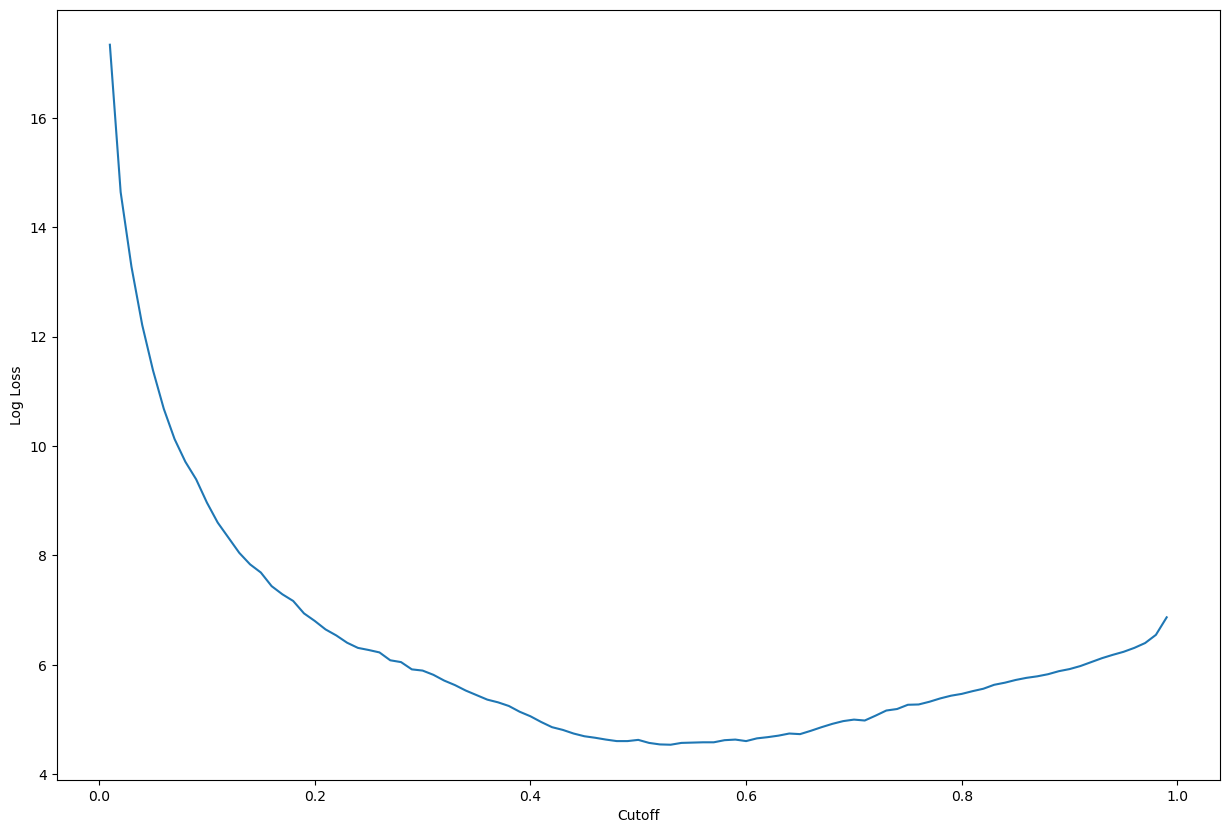

In [65]:
import sklearn
import matplotlib.pyplot as plt
cutoffs = np.arange(0.01,1,0.01)
logs_loss = []
for c in cutoffs:
    logs_loss.append(
        sklearn.metrics.log_loss(test.iloc[:,0], np.where(predictions > c,1,0)))

plt.figure(figsize = (15,10))
plt.plot(cutoffs, logs_loss)
plt.xlabel("Cutoff")
plt.ylabel("Log Loss")
plt.show()

In [67]:
print("Log loss is minimized at a cutoff of ", cutoffs[np.argmin(logs_loss)],
     ', and the log loss vlaue at the minimum is ', np.min(logs_loss))

Log loss is minimized at a cutoff of  0.53 , and the log loss vlaue at the minimum is  4.537969565342555


*** END ***

In [4]:
import numpy as np
arr = np.arange(0,9)
np.split_array(arr,3)

AttributeError: module 'numpy' has no attribute 'split_array'